In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

In [2]:
df = pd.read_csv("../data/insurance_claims.csv")

In [3]:
df["policyid"] = pd.factorize(df["policyid"])[0]
for column in ["incident_date", "policy_date", "dob", "job_start_date", "occupancy_date"]:
    for i in range(len(df)):
        df.loc[i, column] = df[column][i].split("-")[0]
        
    df[column] = df[column].astype(int)

In [4]:
df = df.dropna()

In [5]:
result = []
x = df.drop(["fraudulent"], axis=1)
y = df["fraudulent"]

random_state = 64
# Разделяем данные на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

count_class_0, count_class_1 = y_train.value_counts()

scale_pos_weight = count_class_0 / count_class_1

In [9]:
model = xgb.XGBClassifier(random_state=random_state,
                          scale_pos_weight=scale_pos_weight,
                          tree_method="approx",
                          learning_rate=0.4,
                          min_child_weight=3,
                          subsample=0.78,
                          colsample_bytree=0.8,
                          max_delta_step=0.013,
                          max_depth=4,
                          n_estimators=100,
                          objective="binary:logistic",
                          eval_metric="auc",
                          early_stopping_rounds=25
                          )
model.fit(x_train, y_train, eval_set=[(x_test, y_test)])
print(1)

[0]	validation_0-auc:0.51743
[1]	validation_0-auc:0.55198
[2]	validation_0-auc:0.55512
[3]	validation_0-auc:0.57466
[4]	validation_0-auc:0.58336
[5]	validation_0-auc:0.59870
[6]	validation_0-auc:0.59014
[7]	validation_0-auc:0.58541
[8]	validation_0-auc:0.58745
[9]	validation_0-auc:0.58738
[10]	validation_0-auc:0.59578
[11]	validation_0-auc:0.60125
[12]	validation_0-auc:0.60318
[13]	validation_0-auc:0.59955
[14]	validation_0-auc:0.60131
[15]	validation_0-auc:0.59978
[16]	validation_0-auc:0.60148
[17]	validation_0-auc:0.60127
[18]	validation_0-auc:0.59670
[19]	validation_0-auc:0.59471
[20]	validation_0-auc:0.59225
[21]	validation_0-auc:0.59288
[22]	validation_0-auc:0.59218
[23]	validation_0-auc:0.59227
[24]	validation_0-auc:0.59074
[25]	validation_0-auc:0.59110
[26]	validation_0-auc:0.59369
[27]	validation_0-auc:0.59377
[28]	validation_0-auc:0.59210
[29]	validation_0-auc:0.59290
[30]	validation_0-auc:0.59138
[31]	validation_0-auc:0.59426
[32]	validation_0-auc:0.59389
[33]	validation_0-au

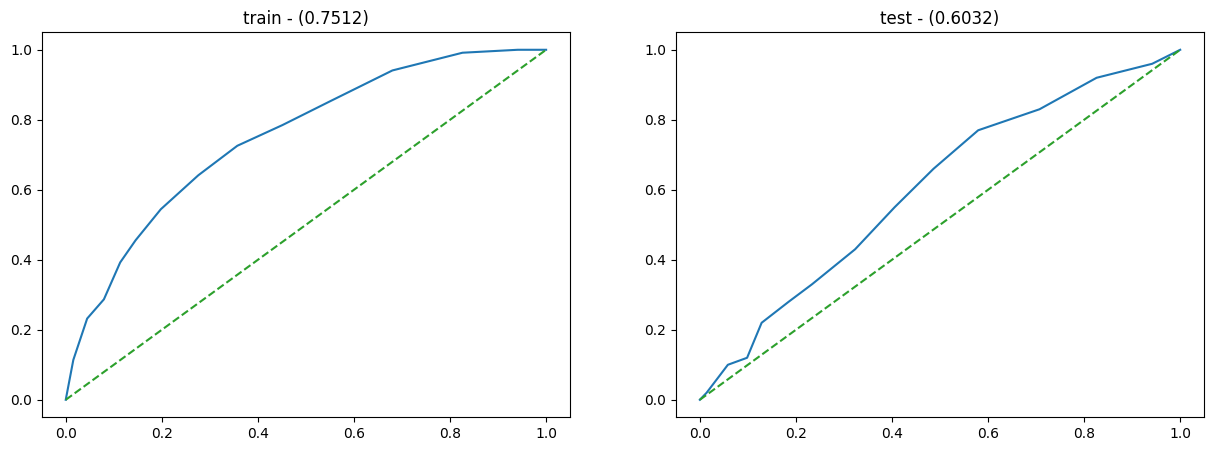

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
title = ["train", "test"]
for i, data in enumerate([[x_train, y_train], [x_test, y_test]]):
    prediction, target_list = model.predict_proba(data[0])[:, [1]], data[1]
    logit_roc_aut = roc_auc_score(target_list, prediction)
    fpr, tpr, thresholds = roc_curve(target_list, prediction)

    axs[i].plot(fpr, tpr, logit_roc_aut)
    axs[i].plot([0, 1], [0, 1], '--')
    axs[i].set_title(f"{title[i]} - ({round(logit_roc_aut, 4)})")
plt.show()

In [8]:
df = pd.read_csv("../data/insurance_claims.csv")

df["policyid"] = pd.factorize(df["policyid"])[0]
for column in ["incident_date", "policy_date", "dob", "job_start_date", "occupancy_date"]:
    for i in range(len(df)):
        df.loc[i, column] = df[column][i].split("-")[0]
        
    df[column] = df[column].astype(int)
    
df = df[df["fraudulent"].isna()]

x = df.drop(["fraudulent"], axis=1) 
y = df["fraudulent"]

prediction = model.predict_proba(x)[:, [1]]
prediction_df = pd.DataFrame(prediction, columns=["fraudulent"])
prediction_df.to_csv("prediction.csv", index=False)